In [7]:
#conv2 is used for images and 3d is used for videos
#flatten will make our multi dimenshion into single array
import numpy as np
from tensorflow.keras import Sequential
import random
import matplotlib.pyplot as plt
import tensorflow.keras.models 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

**IMAGE PREPROCESSING**

**Loading the DATA SET**

In [8]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')


**Reshaping the Images**

In [9]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

#rescaling the values of RGB 
X_train = X_train/255.0
X_test = X_test/255.0

In [10]:
print("shape of X_train: ", X_train.shape)
print("shape of Y_train: ", X_train.shape)
print("shape of X_test: ", X_test.shape)
print("shape of Y_test: ", X_test.shape)

shape of X_train:  (2000, 100, 100, 3)
shape of Y_train:  (2000, 100, 100, 3)
shape of X_test:  (400, 100, 100, 3)
shape of Y_test:  (400, 100, 100, 3)


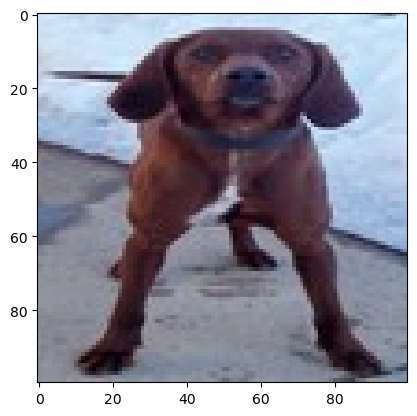

In [11]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()


##**Building MODEL**##

In [12]:
model = Sequential([         
    Conv2D(32, (3,3), activation ='relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)), 
    
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
                                                                            #32 means, 32 filter. (3,3) size filter, that is height and width
])

**Cost Function and Back Propagation**

In [13]:
model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics = ['accuracy'])

In [14]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 14s 406ms/step - loss: 0.7411 - accuracy: 0.5245
Epoch 2/5
32/32 [==============================] - 12s 378ms/step - loss: 0.6730 - accuracy: 0.5875
Epoch 3/5
32/32 [==============================] - 12s 372ms/step - loss: 0.6418 - accuracy: 0.6300
Epoch 4/5
32/32 [==============================] - 12s 376ms/step - loss: 0.6200 - accuracy: 0.6645
Epoch 5/5
32/32 [==============================] - 12s 387ms/step - loss: 0.5609 - accuracy: 0.7095


In [15]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 32ms/step - loss: 0.5964 - accuracy: 0.6875


[0.5963798761367798, 0.6875]

**#MAKING Prediction**

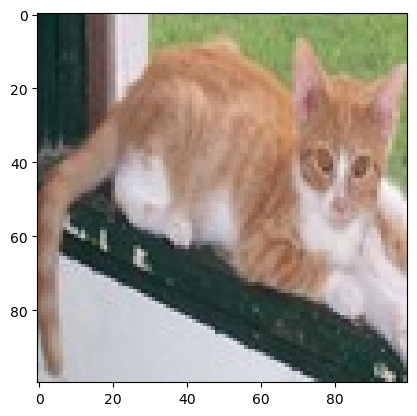

1/1 [==============================] - 0s 23ms/step
The above image is a :  cat


In [26]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :]. reshape(1, 100, 100, 3))
y_pred = y_pred >0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

    print("The above image is a : ", pred)